In [162]:
# ライブラリの取得
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(font="IPAexGothic",style="white")　多分いらなそう
# import oandapy
import configparser
import datetime
from datetime import datetime, timedelta

import warnings
warnings.simplefilter('ignore')

# CSVデータの読み込み
import os
working_directory=os.getcwd()
#print(working_directory)
path_train=working_directory+'/finance2_train.csv'
path_test=working_directory+'/finance2_test.csv'
path_submit=working_directory+'/finance2_submit.csv'

#データフレームの生成
df_train=pd.read_csv(path_train)
df_test=pd.read_csv(path_test)
df_submit=pd.read_csv(path_submit)

In [163]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

In [164]:
# Dateがobject型になっているので日付型に変換
df_train['Date']=pd.to_datetime(df_train['Date'],format='%Y/%m/%d')
df_test['Date']=pd.to_datetime(df_test['Date'],format='%Y/%m/%d')

In [165]:
# Dateをインデックスに指定
df_train.set_index('Date',inplace=True)
df_test.set_index('Date',inplace=True)

In [172]:
x_train=np.array(df_train)
y_train=df_train['Close']

In [173]:
x_train

array([[100.41690048,  99.95079735, 100.31420265, 100.23519783],
       [100.93040169, 100.17200241, 100.25100121, 100.71709831],
       [101.86260193, 100.71709831, 100.79609711, 101.46760193],
       ...,
       [ 89.12543106,  86.57135971,  89.0725    ,  89.07407913],
       [ 88.5021199 ,  87.53200241,  87.53200241,  87.53041725],
       [ 89.18546822,  88.19796822,  88.69329735,  88.73279976]])

In [220]:
def split(data, start, delimit, adjustment):
    arraydata=data[start:delimit]
    arraydata2=data[delimit:len(data)+adjustment]
    return arraydata,arraydata2

In [228]:
print(f'/2\n{len(x_train)*0.3}\n')
print(f'/3\n{len(x_train)*0.6}\n')
print(f'/3\n{len(x_train)*0.8}\n')
print(f's\n{len(x_train)}\n')

/2
656.1

/3
1312.2

/3
1749.6000000000001

s
2187



In [222]:
s,s2=split(data=x_train,start=0,delimit=4,adjustment=1)
s

array([[100.41690048,  99.95079735, 100.31420265, 100.23519783],
       [100.93040169, 100.17200241, 100.25100121, 100.71709831],
       [101.86260193, 100.71709831, 100.79609711, 101.46760193],
       [101.68880096, 101.13580338, 101.4834053 , 101.49130096]])

In [223]:
print(f's\n{s}\n')
print(f's2\n{s2}\n')

s
[[100.41690048  99.95079735 100.31420265 100.23519783]
 [100.93040169 100.17200241 100.25100121 100.71709831]
 [101.86260193 100.71709831 100.79609711 101.46760193]
 [101.68880096 101.13580338 101.4834053  101.49130096]]

s2
[[101.60979614 101.03309952 101.4834053  101.34119904]
 [101.80729614 100.89880096 101.30960434 101.73619904]
 [102.20229614 101.60190048 101.7440947  101.99690048]
 ...
 [ 89.12543106  86.57135971  89.0725      89.07407913]
 [ 88.5021199   87.53200241  87.53200241  87.53041725]
 [ 89.18546822  88.19796822  88.69329735  88.73279976]]



In [224]:
df_train

,High,Low,Open,Close
Date,,,,
2003-01-23,100.416900,99.950797,100.314203,100.235198
2003-01-24,100.930402,100.172002,100.251001,100.717098
2003-01-27,101.862602,100.717098,100.796097,101.467602
2003-01-28,101.688801,101.135803,101.483405,101.491301
2003-01-29,101.609796,101.033100,101.483405,101.341199
...,...,...,...,...
2011-07-07,92.264890,90.571922,92.174042,92.193787
2011-07-10,90.644598,88.792047,90.489759,90.492917
2011-07-11,89.125431,86.571360,89.072500,89.074079


In [215]:
len(s2)

2183

In [216]:
typeInfo(s2)

s2 は ndarray型
s2 の行数, 列数・・・(2183, 4)



In [229]:
#学習データ、検証データ、テストデータの作成
X=df_train.drop(["Close"],1)
y=df_train["Close"]
# X_test=df_test2.drop("Date",1)
# 学習データと検証データに80:20の割合で2分割する
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.20, shuffle=False)
X_train

,High,Low,Open
Date,,,
2003-01-23,100.416900,99.950797,100.314203
2003-01-24,100.930402,100.172002,100.251001
2003-01-27,101.862602,100.717098,100.796097
2003-01-28,101.688801,101.135803,101.483405
2003-01-29,101.609796,101.033100,101.483405
...,...,...,...
2009-11-02,106.199694,104.276842,104.276842
2009-11-03,105.814181,104.066697,105.489495
2009-11-04,107.202998,104.698699,105.164796


In [230]:
X_val

,High,Low,Open
Date,,,
2009-11-09,106.696615,105.362296,105.512398
2009-11-10,106.928867,105.968225,106.492002
2009-11-11,106.906748,105.694095,106.166520
2009-11-12,106.635776,105.796799,106.397194
2009-11-13,106.200490,104.990995,105.946900
...,...,...,...
2011-07-07,92.264890,90.571922,92.174042
2011-07-10,90.644598,88.792047,90.489759
2011-07-11,89.125431,86.571360,89.072500


In [231]:
# K分割交差検証

In [234]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=False)

In [235]:
from sklearn.model_selection import cross_validate

In [ ]:
model=

In [73]:
is_tr = df_train[df_train['Date']<'2003-01-29']
is_va = df_train[df_train['Date']=='2003-01-29']
# tr_x, va_x=train_x[is_tr],train_x[is_va]
# tr_y, va_y=train_y[is_tr],train_y[is_va]

In [74]:
is_tr

,Date,High,Low,Open,Close
0,2003-01-23,100.416900,99.950797,100.314203,100.235198
1,2003-01-24,100.930402,100.172002,100.251001,100.717098
2,2003-01-27,101.862602,100.717098,100.796097,101.467602
3,2003-01-28,101.688801,101.135803,101.483405,101.491301


In [75]:
is_va

,Date,High,Low,Open,Close
4,2003-01-29,101.609796,101.0331,101.483405,101.341199


In [76]:
is_tr = df_train['Date']<'2003-01-29'
is_va = df_train['Date']=='2003-01-29'
tr_x, va_x=df_train[is_tr],df_train[is_va]
# tr_y, va_y=train_y[is_tr],train_y[is_va]

In [77]:
is_tr

0        True
1        True
2        True
3        True
4       False
        ...  
2182    False
2183    False
2184    False
2185    False
2186    False
Name: Date, Length: 2187, dtype: bool

In [78]:
tr_x

,Date,High,Low,Open,Close
0,2003-01-23,100.416900,99.950797,100.314203,100.235198
1,2003-01-24,100.930402,100.172002,100.251001,100.717098
2,2003-01-27,101.862602,100.717098,100.796097,101.467602
3,2003-01-28,101.688801,101.135803,101.483405,101.491301


In [79]:
va_x

,Date,High,Low,Open,Close
4,2003-01-29,101.609796,101.0331,101.483405,101.341199


In [80]:
va_period_list=['2003-01-27','2003-02-03','2004-01-27']

In [81]:
for va_period in va_period_list:
    is_tr=df_train['Date']<va_period
    is_va=df_train['Date']==va_period
    tr_x,va_x=df_train[is_tr].copy(),df_train[is_va].copy()

In [82]:
typeInfo(tr_x)

tr_x は DataFrame型
tr_x の行数, 列数・・・(263, 5)



In [83]:
tr_x

,Date,High,Low,Open,Close
0,2003-01-23,100.416900,99.950797,100.314203,100.235198
1,2003-01-24,100.930402,100.172002,100.251001,100.717098
2,2003-01-27,101.862602,100.717098,100.796097,101.467602
3,2003-01-28,101.688801,101.135803,101.483405,101.491301
4,2003-01-29,101.609796,101.033100,101.483405,101.341199
...,...,...,...,...,...
258,2004-01-20,106.713201,104.556505,104.627602,106.397194
259,2004-01-21,106.942296,106.255000,106.381403,106.823801
260,2004-01-22,107.108201,106.231301,106.815905,106.673699
261,2004-01-23,106.950204,105.417602,106.665803,106.223405


In [84]:
va_x

,Date,High,Low,Open,Close
263,2004-01-27,105.567704,104.248405,104.904095,105.433405


In [86]:
# 
print(f'train\n{df_train}\n')
print(f'test\n{df_test}\n')

train
                  High         Low        Open       Close
Date                                                      
2003-01-23  100.416900   99.950797  100.314203  100.235198
2003-01-24  100.930402  100.172002  100.251001  100.717098
2003-01-27  101.862602  100.717098  100.796097  101.467602
2003-01-28  101.688801  101.135803  101.483405  101.491301
2003-01-29  101.609796  101.033100  101.483405  101.341199
...                ...         ...         ...         ...
2011-07-07   92.264890   90.571922   92.174042   92.193787
2011-07-10   90.644598   88.792047   90.489759   90.492917
2011-07-11   89.125431   86.571360   89.072500   89.074079
2011-07-12   88.502120   87.532002   87.532002   87.530417
2011-07-13   89.185468   88.197968   88.693297   88.732800

[2187 rows x 4 columns]

test
                 High        Low       Open      Close
Date                                                  
2011-07-14  88.730431  87.984671  88.535300  88.551097
2011-07-17  88.242998  87.42693

In [163]:
X_train=df_train.copy()

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [166]:
#　標準化時の情報
X_train_mean=scaler.mean_
X_train_scale=scaler.scale_
X_train_var=scaler.var_
Xtrain_seen=scaler.n_samples_seen_

In [167]:
# 配列抜粋
print(f'X_train_mean : {X_train_mean}\n')
print(f'X_train_scale\n{X_train_scale}\n')
print(f'X_train_var\n{X_train_var}\n')
print(f'Xtrain_seen\n{Xtrain_seen}\n')

X_train_mean : [108.73433021 107.61034712 108.20329868 108.20490455]

X_train_scale
[12.23031177 12.29683146 12.25710705 12.26895736]

X_train_var
[149.58052597 151.212064   150.23667333 150.5273148 ]

Xtrain_seen
2187



In [168]:
train = scaler.transform(X_train)
train

array([[-0.68006686, -0.62288808, -0.64363442, -0.64958305],
       [-0.63808091, -0.6048993 , -0.64879073, -0.61030502],
       [-0.56186043, -0.56057114, -0.60431891, -0.54913408],
       ...,
       [-1.60330329, -1.71092752, -1.56079233, -1.55928698],
       [-1.65426775, -1.63280637, -1.68647432, -1.68510548],
       [-1.59839441, -1.57864886, -1.5917297 , -1.58710347]])

In [169]:
test = scaler.transform(df_test)
test

array([[-1.6356001 , -1.59599457, -1.60461998, -1.60191342],
       [-1.67545464, -1.64135105, -1.62846755, -1.62509342],
       [-1.63689225, -1.610321  , -1.63890851, -1.63732771],
       ...,
       [-0.97991029, -0.94507267, -0.98297678, -0.98441163],
       [-0.97997485, -0.9202101 , -0.93876213, -0.93824371],
       [-1.00464985, -0.93190249, -0.96602576, -0.96445084]])

In [170]:
X_train_mean=scaler.mean_
X_train_scale=scaler.scale_
X_train_var=scaler.var_
Xtrain_seen=scaler.n_samples_seen_

In [171]:
# 配列抜粋
print(f'X_train_mean : {X_train_mean}\n')
print(f'X_train_scale\n{X_train_scale}\n')
print(f'X_train_var\n{X_train_var}\n')
print(f'Xtrain_seen\n{Xtrain_seen}\n')

X_train_mean : [108.73433021 107.61034712 108.20329868 108.20490455]

X_train_scale
[12.23031177 12.29683146 12.25710705 12.26895736]

X_train_var
[149.58052597 151.212064   150.23667333 150.5273148 ]

Xtrain_seen
2187



In [172]:
scaler.inverse_transform(train)

array([[100.41690048,  99.95079735, 100.31420265, 100.23519783],
       [100.93040169, 100.17200241, 100.25100121, 100.71709831],
       [101.86260193, 100.71709831, 100.79609711, 101.46760193],
       ...,
       [ 89.12543106,  86.57135971,  89.0725    ,  89.07407913],
       [ 88.5021199 ,  87.53200241,  87.53200241,  87.53041725],
       [ 89.18546822,  88.19796822,  88.69329735,  88.73279976]])

In [173]:
scaler.inverse_transform(test)

array([[88.73043106, 87.98467087, 88.53529976, 88.55109711],
       [88.24299759, 87.42692986, 88.24299759, 88.26670265],
       [88.71462769, 87.80850121, 88.11502159, 88.11660072],
       ...,
       [96.74972183, 95.98894783, 96.15484711, 96.12720024],
       [96.74893227, 96.29467865, 96.69679077, 96.69363251],
       [96.44714928, 96.15089928, 96.36261749, 96.37209831]])

In [174]:
Close_Col=3

In [175]:
scaler_mean=scaler.mean_[Close_Col]
scaler_scale=scaler.scale_[Close_Col]

In [176]:
# 
print(f'scaler_mean : {scaler_mean}\n')
print(f'scaler_scale\n{scaler_scale}\n')

scaler_mean : 108.20490454776242

scaler_scale
12.268957364174673



In [177]:
# Closeを戻すことに成功
test*scaler_scale+scaler_mean

array([[88.13779666, 88.6237152 , 88.51789038, 88.55109711],
       [87.64882299, 88.06723846, 88.22530561, 88.26670265],
       [88.12194335, 88.44794487, 88.09720589, 88.11660072],
       ...,
       [96.18242696, 96.6098483 , 96.1448044 , 96.12720024],
       [96.1816349 , 96.9148861 , 96.68727202, 96.69363251],
       [95.87889833, 96.77143264, 96.35277566, 96.37209831]])

In [178]:
# 変数名をそのままprint関数内で表示させる関数
def chkprint(*args):
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break          
    return target

# データがどのデータ型か、列数、行数を表示する関数
def typeInfo(targetData):
    if (type(targetData) is pd.core.frame.DataFrame):
        print("{} は DataFrame型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is list):
        print("{} は list型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), pd.DataFrame(targetData).shape))    # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is np.ndarray):
        print("{} は ndarray型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる
    if (type(targetData) is pd.core.series.Series):
        print("{} は Series型".format(chkprint(targetData)))
        print("{} の行数, 列数・・・{}\n".format(chkprint(targetData), targetData.shape))     # shapeの表示内容は、(行数, 列数)となる

In [179]:
# windowを設定
window_len=6

In [180]:
# データの標準化
def get_standardized_t(X, num_date):
    X = np.array(X)
    X_t_list = []
    for i in range(0, len(X) - num_date): # len(X) - num_date, 6　とすると6日毎の値を得られる
        X_t = X[i:i+num_date]
        X_standardized = scaler.transform(X_t)
        X_t_list.append(X_standardized)
    return np.array(X_t_list)

In [181]:
# 期間の設定
num_date = 6
# 関数get_standardized_tの呼び出し
X_array_data = get_standardized_t(X=df_train, num_date=num_date)

In [182]:
# 配列抜粋
print(f'X_array_data_配列数 : {len(X_array_data)}\n')
print(f'X_array_data[0]\n{X_array_data[0]}\n')
print(f'X_array_data[1]\n{X_array_data[1]}\n')
print(f'X_array_data[-1]\n{X_array_data[-1]}\n')

X_array_data_配列数 : 2181

X_array_data[0]
[[-0.68006686 -0.62288808 -0.64363442 -0.64958305]
 [-0.63808091 -0.6048993  -0.64879073 -0.61030502]
 [-0.56186043 -0.56057114 -0.60431891 -0.54913408]
 [-0.57607111 -0.5265213  -0.54824465 -0.54720245]
 [-0.58253086 -0.53487336 -0.54824465 -0.55943674]
 [-0.56638246 -0.54579476 -0.56242426 -0.52724167]]

X_array_data[1]
[[-0.63808091 -0.6048993  -0.64879073 -0.61030502]
 [-0.56186043 -0.56057114 -0.60431891 -0.54913408]
 [-0.57607111 -0.5265213  -0.54824465 -0.54720245]
 [-0.58253086 -0.53487336 -0.54824465 -0.55943674]
 [-0.56638246 -0.54579476 -0.56242426 -0.52724167]
 [-0.53408565 -0.48861747 -0.52697622 -0.5059928 ]]

X_array_data[-1]
[[-1.33033083 -1.32828904 -1.28951219 -1.2896208 ]
 [-1.34731898 -1.32854587 -1.35067736 -1.35079174]
 [-1.34660835 -1.38559474 -1.30775204 -1.30501044]
 [-1.47909    -1.53033729 -1.4451648  -1.44364242]
 [-1.60330329 -1.71092752 -1.56079233 -1.55928698]
 [-1.65426775 -1.63280637 -1.68647432 -1.68510548]]



In [183]:
train_out=df_train['Close'][window_len:]

In [184]:
train_out = [np.array(train_out_data) for train_out_data in train_out]
train_out = np.array(train_out)

In [185]:
train_out

array([101.99690048, 102.52619904, 103.00809952, ...,  89.07407913,
        87.53041725,  88.73279976])

In [186]:
std_train_out = (train_out-scaler_mean)/scaler_scale
std_train_out

array([-0.5059928 , -0.46285152, -0.42357349, ..., -1.55928698,
       -1.68510548, -1.58710347])

In [187]:
std_train_out*scaler_scale+scaler_mean

array([101.99690048, 102.52619904, 103.00809952, ...,  89.07407913,
        87.53041725,  88.73279976])

In [188]:
len(std_train_out)

2181

In [189]:
typeInfo(test)

test は ndarray型
test の行数, 列数・・・(1314, 4)



In [190]:
# モデルの定義
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [191]:
# LSTMのモデルを設定
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2]))) #バッチ数、時系列データ数、特徴量数
    model.add(Dropout(dropout)) 
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [193]:
np.random.seed(202)
 
# 初期モデルの構築
yen_model = build_model(X_array_data, output_size=1, neurons = 20)

# データを流してフィッティングさせる
yen_history = yen_model.fit(X_array_data, std_train_out, 
                            epochs=25, batch_size=1, verbose=2, shuffle=False)
# 11/5 epochs=50からepochs=10に変更
# 11/5 shuffle=TrueからFalseに変更

Epoch 1/25
2181/2181 - 4s - loss: 0.1410
Epoch 2/25
2181/2181 - 3s - loss: 0.1230
Epoch 3/25
2181/2181 - 3s - loss: 0.1183
Epoch 4/25
2181/2181 - 3s - loss: 0.1166
Epoch 5/25
2181/2181 - 3s - loss: 0.1142
Epoch 6/25
2181/2181 - 3s - loss: 0.1105
Epoch 7/25
2181/2181 - 3s - loss: 0.1110
Epoch 8/25
2181/2181 - 3s - loss: 0.1082
Epoch 9/25
2181/2181 - 3s - loss: 0.1090
Epoch 10/25
2181/2181 - 3s - loss: 0.1111
Epoch 11/25
2181/2181 - 3s - loss: 0.1096
Epoch 12/25
2181/2181 - 3s - loss: 0.1086
Epoch 13/25
2181/2181 - 3s - loss: 0.1119
Epoch 14/25
2181/2181 - 3s - loss: 0.1064
Epoch 15/25
2181/2181 - 3s - loss: 0.1083
Epoch 16/25
2181/2181 - 3s - loss: 0.1085
Epoch 17/25
2181/2181 - 3s - loss: 0.1143
Epoch 18/25
2181/2181 - 3s - loss: 0.1079
Epoch 19/25
2181/2181 - 3s - loss: 0.1083
Epoch 20/25
2181/2181 - 3s - loss: 0.1072
Epoch 21/25
2181/2181 - 3s - loss: 0.1116
Epoch 22/25
2181/2181 - 3s - loss: 0.1074
Epoch 23/25
2181/2181 - 3s - loss: 0.1080
Epoch 24/25
2181/2181 - 3s - loss: 0.1070
E

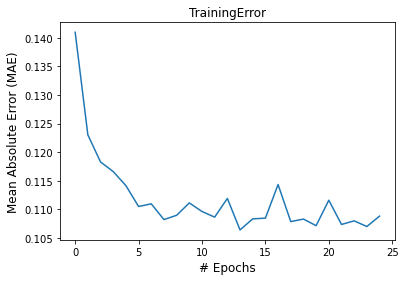

In [194]:
# MAEをプロットしてみよう
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(yen_history.epoch, yen_history.history['loss'])
ax1.set_title('TrainingError')
 
if yen_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

In [195]:
#作成したモデルを使用し予測。
train_pred = yen_model.predict(test_array_data)

NameError: name 'test_array_data' is not defined